In [1]:
from glob import glob
import pandas as pd
from pathlib import Path
import sys
from itertools import combinations, product
sys.path.append('../')

import matplotlib.pyplot as plt
from tqdm import tqdm
from astropy.table import unique, join
import papermill as pm


In [2]:
from uvot import filters
from xrt import curves
from source_names_dict import source_names_dict, source_names_w_counterparts, source_names_readable
from get_closest_srcreg import get_src_region_dict
from uvot import read_uvotsource, calc_uvot_flags, filters, filter_colors, filter_markers
from xrt import load_xrt, rename_xrt_cols, curves
from lightcurve import LightCurve

In [3]:
all_df = []
for f in tqdm(glob('../lightcurves/correlation_output/*/tables/*table_prop*')):
    sp = f.split('/')[-1].split(',')
    simbad_name = sp[0]
    xrt_curve   = sp[1]
    uvot_filter = sp[2]
    include_bad = sp[3]
    include_UL  = sp[4]
    
    df = pd.read_csv(f)
    df['simbad_name'] = simbad_name
    df['xrt_curve'] = xrt_curve
    df['uvot_filter'] = uvot_filter
    df['include_bad'] = include_bad
    df['include_UL']  = include_UL
    
    all_df.append(df)
df_prop = pd.concat(all_df)
df_prop


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1019/1019 [00:06<00:00, 157.92it/s]


,name,length,N_obs,N_bad,N_good,N_UL,simbad_name,xrt_curve,uvot_filter,include_bad,include_UL
0,tab,166,101,0,166,2,Holmberg_II_X-1,FULL,U,False,False
1,tab_5_sig,166,101,0,166,2,Holmberg_II_X-1,FULL,U,False,False
2,tab_UL,2,2,0,2,2,Holmberg_II_X-1,FULL,U,False,False
3,tab_no_UL,164,99,0,164,0,Holmberg_II_X-1,FULL,U,False,False
4,tab_BAD,0,0,0,0,0,Holmberg_II_X-1,FULL,U,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3,tab_no_UL,41,36,1,40,0,[SRW2006b]_NGC_55_ULX,SOFT,UVW2,True,False
4,tab_BAD,1,1,1,0,0,[SRW2006b]_NGC_55_ULX,SOFT,UVW2,True,False
5,tab_no_BAD,40,35,0,40,0,[SRW2006b]_NGC_55_ULX,SOFT,UVW2,True,False
6,tab_UL_no_bad,0,0,0,0,0,[SRW2006b]_NGC_55_ULX,SOFT,UVW2,True,False


In [4]:
all_res = []
for f in tqdm(glob('../lightcurves/correlation_output/*/tables/*table_corr*')):
    sp = f.split('/')[-1].split(',')
    simbad_name = sp[0]
    xrt_curve = sp[1]
    uvot_filter = sp[2]
    include_bad = sp[3]
    include_UL  = sp[4]
    
    # print(simbad_name, xrt_curve, uvot_filter)
    
    df = pd.read_csv(f)
    r_mean = df['r'].mean()
    r_std  = df['r'].std()
    m_mean = df['m'].mean()
    m_std  = df['m'].std()
    c_mean = df['c'].mean()
    c_std  = df['c'].std()
    
    res = {}
    res['simbad_name'] = simbad_name
    res['xrt_curve'] = xrt_curve
    res['uvot_filter'] = uvot_filter
    res['include_bad'] = include_bad
    res['include_UL'] = include_UL
    
    res['r_mean'] = r_mean
    res['r_std'] = r_std
    res['m_mean'] = m_mean
    res['m_std'] = m_std
    res['c_mean'] = c_mean
    res['c_std'] = c_std
    
    all_res.append(res)
df = pd.DataFrame(all_res)
df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1019/1019 [00:12<00:00, 78.54it/s]


,simbad_name,xrt_curve,uvot_filter,include_bad,include_UL,r_mean,r_std,m_mean,m_std,c_mean,c_std
0,Holmberg_II_X-1,FULL,U,False,False,0.060790,0.035143,0.262742,0.152084,4.581733,0.025354
1,Holmberg_II_X-1,FULL,U,False,True,0.223747,0.050548,1.445039,0.531554,4.362411,0.097665
2,Holmberg_II_X-1,FULL,U,True,False,0.060671,0.035561,0.262324,0.153964,4.581791,0.025517
3,Holmberg_II_X-1,FULL,U,True,True,0.224846,0.049680,1.456770,0.530538,4.360249,0.097472
4,Holmberg_II_X-1,FULL,UVM2,False,False,-0.028258,0.078480,-0.114649,0.305283,2.070258,0.060918
...,...,...,...,...,...,...,...,...,...,...,...
1014,[SRW2006b]_NGC_55_ULX,SOFT,UVM2,True,False,0.088633,0.150098,0.286430,0.488772,0.295750,0.020857
1015,[SRW2006b]_NGC_55_ULX,SOFT,UVW1,False,False,-0.025397,0.083256,-0.152800,0.513456,0.597235,0.024708
1016,[SRW2006b]_NGC_55_ULX,SOFT,UVW1,True,False,-0.019086,0.081635,-0.108179,0.475556,0.594623,0.022619
1017,[SRW2006b]_NGC_55_ULX,SOFT,UVW2,False,False,-0.166631,0.106321,-0.534569,0.349669,0.490887,0.016000


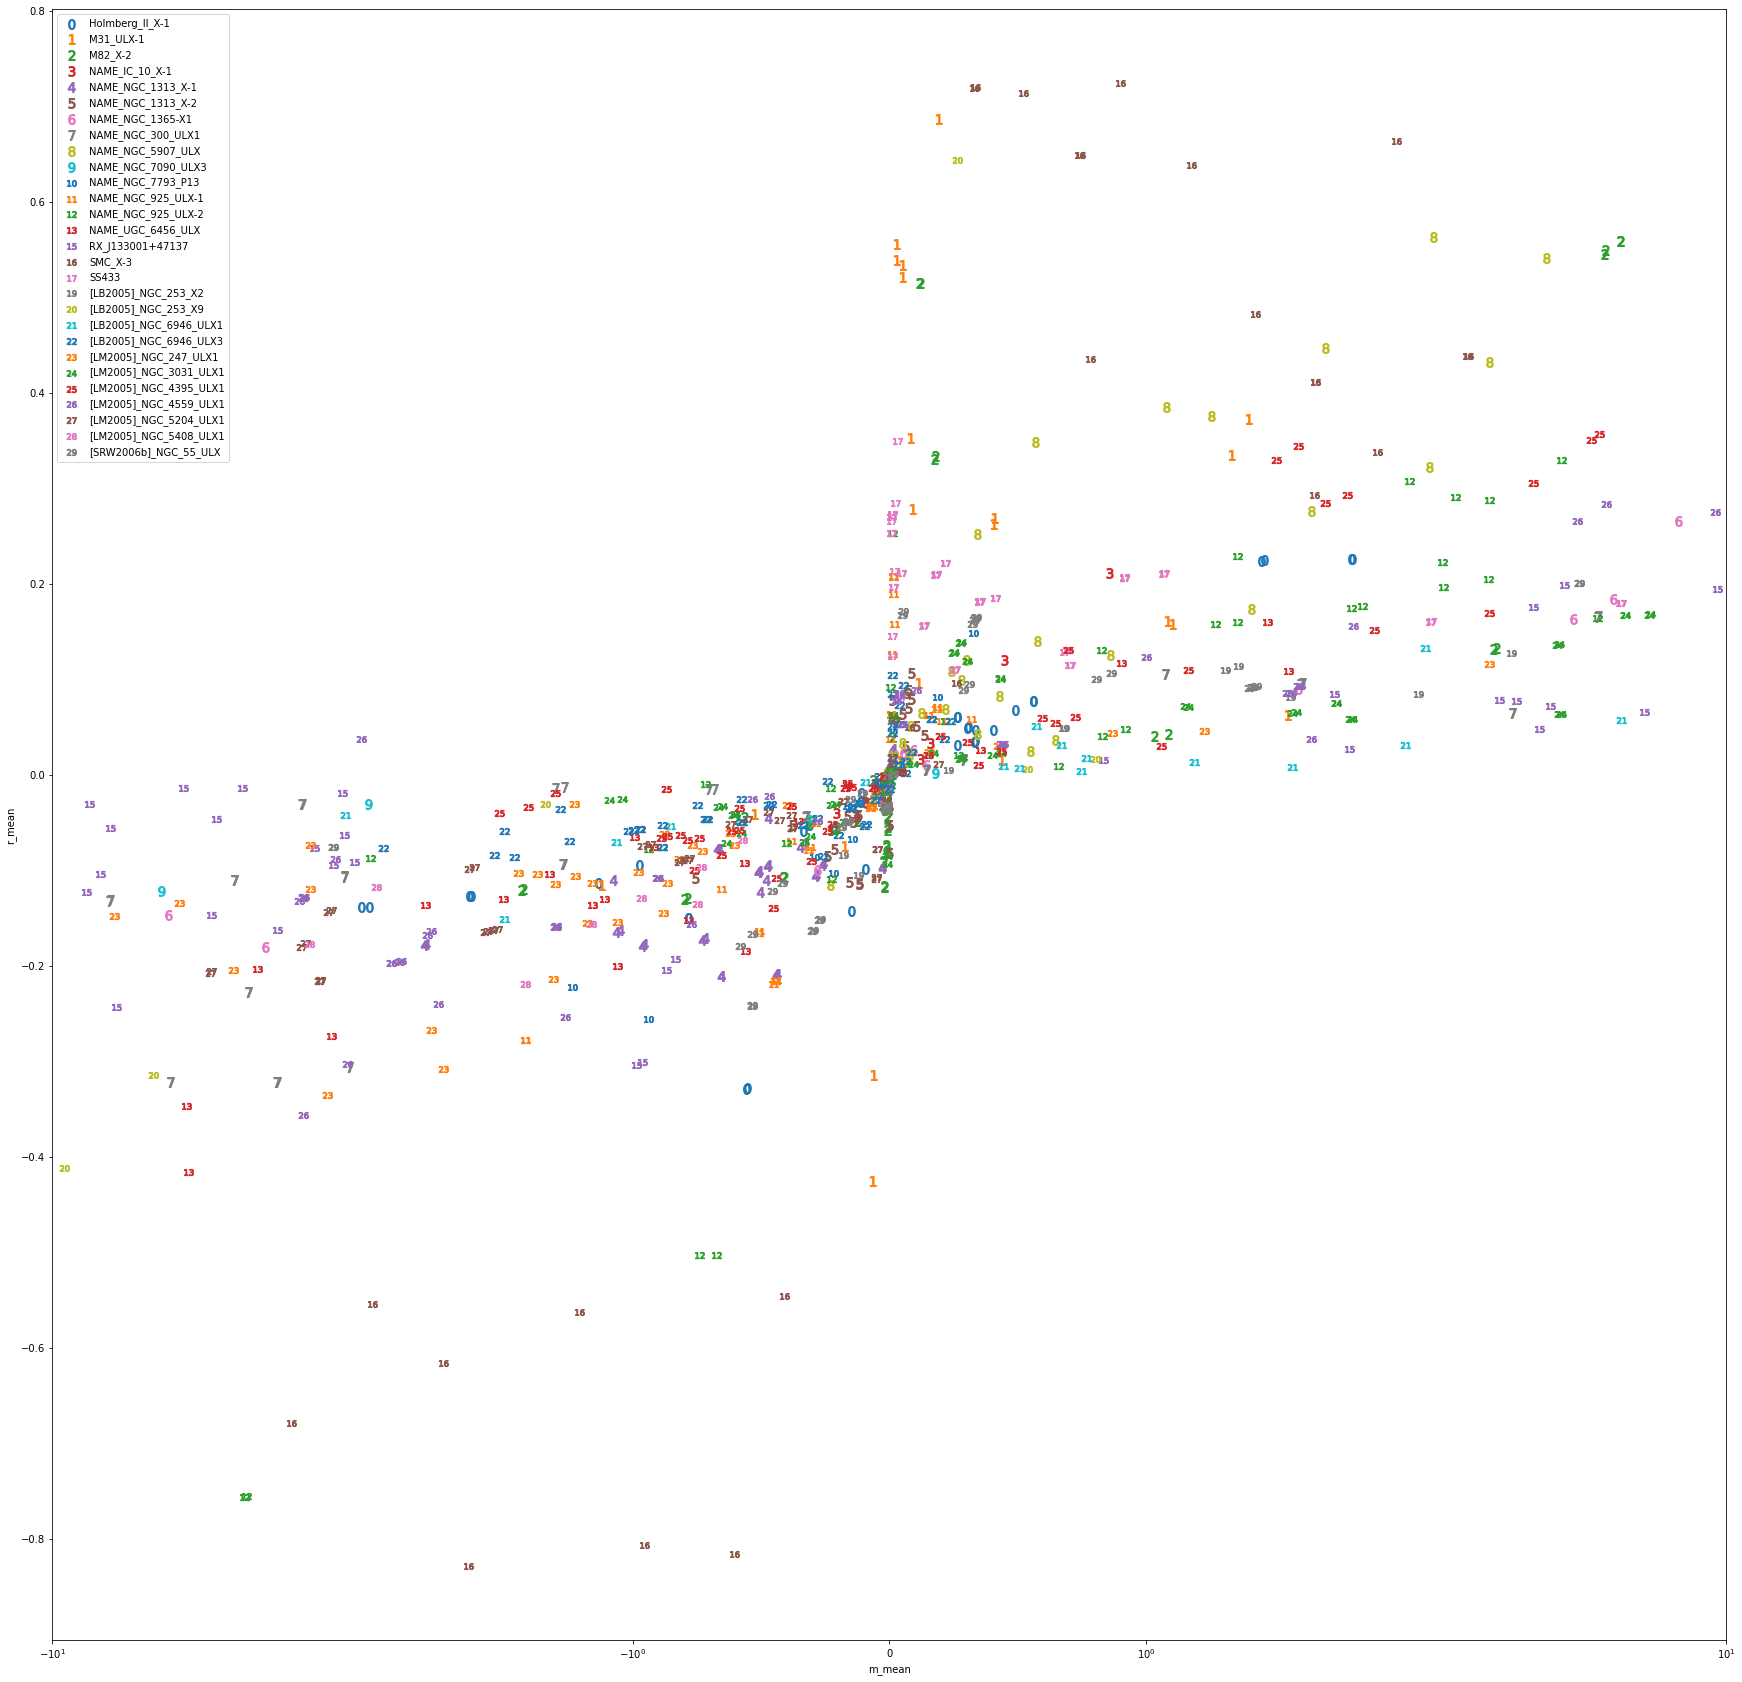

In [5]:
exclude = ['SWIFT_J0243.6+6124', 'NOVA_Cyg_1989']

nsig     = 2
r_mu     = df['r_mean'].mean()
r_std    = df['r_mean'].std()
r_sig_up = r_mu + nsig*r_std
r_sig_lo = r_mu - nsig*r_std


#df['nsig'] = abs((df['r_mean'] - r_mu) / r_std)
df['nsig'] = abs(df['r_mean'] / df['r_std'])


plt.figure(figsize=(30,30), facecolor='white')
for i, s in enumerate(df['simbad_name'].unique()):
    if s in exclude:
        continue
    sub = df[df['simbad_name'] == s]
    plt.scatter(sub['m_mean'], sub['r_mean'], marker=f'${i}$', label=s, s=100)
    #plt.errorbar(sub['m_mean'], sub['r_mean'], xerr=sub['m_std'], yerr=sub['r_std'], marker=f'${i}$', label=s, markersize=10)
plt.xlabel('m_mean')
plt.ylabel('r_mean')

plt.xscale('symlog')
#plt.ylim(-5,5)
plt.xlim(-10,10)
plt.legend()
#plt.ylim(-10,10)


In [6]:
sub_nsig = df[(df['r_mean'] > r_sig_up) | (df['r_mean'] < r_sig_lo)]

In [7]:
df_prop_tab_5_sig = df_prop[df_prop['name'] == 'tab_5_sig']

In [8]:
pd.set_option('display.max_rows', None)

In [11]:
df_5_sig_merge = pd.merge(sub_nsig, df_prop_tab_5_sig, on=['simbad_name','xrt_curve','uvot_filter','include_bad','include_UL'])
df_5_sig_merge

,simbad_name,xrt_curve,uvot_filter,include_bad,include_UL,r_mean,r_std,m_mean,m_std,c_mean,c_std,nsig,name,length,N_obs,N_bad,N_good,N_UL
0,M31_ULX-1,FULL,UVW2,True,False,0.687030,0.230579,0.189701,0.089338,0.106732,0.007050,2.979592,tab_5_sig,93,93,88,5,87
1,NAME_NGC_300_ULX1,FULL,B,False,False,-0.484873,0.026835,-26.661699,2.104958,8.427032,0.146476,-18.068741,tab_5_sig,54,48,0,54,31
2,NAME_NGC_300_ULX1,FULL,B,True,False,-0.484714,0.026467,-26.642606,2.071403,8.427117,0.143570,-18.313546,tab_5_sig,54,48,0,54,31
3,NAME_NGC_300_ULX1,FULL,V,False,False,-0.497688,0.033453,-12.599503,1.150082,4.267684,0.083618,-14.877204,tab_5_sig,49,43,0,49,29
4,NAME_NGC_300_ULX1,FULL,V,True,False,-0.498104,0.033238,-12.619402,1.139924,4.269468,0.084422,-14.986014,tab_5_sig,49,43,0,49,29
5,NAME_NGC_925_ULX-2,FULL,U,False,True,-0.755465,0.238954,-3.813000,5.320390,2.190914,0.137041,-3.161550,tab_5_sig,21,16,16,5,2
6,NAME_NGC_925_ULX-2,FULL,U,True,True,-0.756465,0.203363,-3.853175,3.751091,2.219646,0.054662,-3.719775,tab_5_sig,21,16,16,5,2
7,NAME_NGC_925_ULX-2,FULL,UVW2,False,True,-0.502658,0.161796,-0.674568,0.365471,0.547911,0.018094,-3.106740,tab_5_sig,51,41,29,22,8
8,NAME_NGC_925_ULX-2,FULL,UVW2,True,True,-0.503150,0.141356,-0.741761,0.370748,0.572109,0.011259,-3.559453,tab_5_sig,51,41,29,22,8
9,NAME_UGC_6456_ULX,FULL,UVM2,False,True,0.592502,0.111916,12.493457,3.734659,0.447319,0.092878,5.294151,tab_5_sig,23,14,14,9,7


In [18]:
df_5_sig_merge.query("nsig > 100")

,simbad_name,xrt_curve,uvot_filter,include_bad,include_UL,r_mean,r_std,m_mean,m_std,c_mean,c_std,nsig,name,length,N_obs,N_bad,N_good,N_UL
10,NOVA_Cyg_1989,FULL,U,False,False,0.634600,0.003567,0.069449,0.000619,8.838698,0.038893,177.920245,tab_5_sig,69,69,6,63,8
12,NOVA_Cyg_1989,FULL,U,True,False,0.636515,0.003511,0.069923,0.000612,8.365928,0.037347,181.294042,tab_5_sig,69,69,6,63,8
18,NOVA_Cyg_1989,HARD,U,False,False,0.607074,0.005659,0.094072,0.002486,10.049112,0.095052,107.280612,tab_5_sig,69,69,6,63,0
19,NOVA_Cyg_1989,HARD,U,True,False,0.611863,0.005548,0.095534,0.002537,9.130551,0.088247,110.292581,tab_5_sig,69,69,6,63,0


In [10]:
df[df['simbad_name'] == 'NAME_NGC_7793_P13']

,simbad_name,xrt_curve,uvot_filter,include_bad,include_UL,r_mean,r_std,m_mean,m_std,c_mean,c_std,nsig
315,NAME_NGC_7793_P13,FULL,U,False,False,-0.067156,0.052788,-0.146059,0.115133,0.218607,0.008198,-1.272171
316,NAME_NGC_7793_P13,FULL,U,False,True,0.148646,0.051040,0.326550,0.113717,0.178845,0.008134,2.912325
317,NAME_NGC_7793_P13,FULL,U,True,False,-0.103156,0.046289,-0.219949,0.099407,0.225372,0.006637,-2.228550
318,NAME_NGC_7793_P13,FULL,U,True,True,0.081202,0.043877,0.183917,0.099794,0.191839,0.006769,1.850689
319,NAME_NGC_7793_P13,HARD,U,False,False,-0.085988,0.052906,-0.292661,0.181427,0.220750,0.008063,-1.625305
320,NAME_NGC_7793_P13,HARD,U,True,False,-0.256151,0.034355,-0.941693,0.132883,0.254277,0.004951,-7.456077
321,NAME_NGC_7793_P13,SOFT,U,False,False,-0.032852,0.056898,-0.165198,0.285165,0.213338,0.007886,-0.577383
322,NAME_NGC_7793_P13,SOFT,U,True,False,-0.221827,0.037492,-1.234981,0.220615,0.249702,0.005064,-5.916724
